# 코드자료 링크: https://pytorch.org/hub/pytorch_vision_fcn_resnet101/

### This notebook is optionally accelerated with a GPU runtime.
### If you would like to use this acceleration, please select the menu option "Runtime" -> "Change runtime type", select "Hardware Accelerator" -> "GPU" and click "SAVE"

----------------------------------------------------------------------

# FCN-ResNet101

*Author: Pytorch Team*

**Fully-Convolutional Network model with a ResNet-101 backbone**

_ | _
- | -
![alt](https://pytorch.org/assets/images/deeplab1.png) | ![alt](https://pytorch.org/assets/images/fcn2.png)

In [1]:
import torch
model = torch.hub.load('pytorch/vision:v0.9.0', 'fcn_resnet101', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.9.0.zip" to /root/.cache/torch/hub/v0.9.0.zip
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth


  0%|          | 0.00/208M [00:00<?, ?B/s]

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

All pre-trained models expect input images normalized in the same way,
i.e. mini-batches of 3-channel RGB images of shape `(N, 3, H, W)`, where `N` is the number of images, `H` and `W` are expected to be at least `224` pixels.
The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]`
and `std = [0.229, 0.224, 0.225]`.

The model returns an `OrderedDict` with two Tensors that are of the same height and width as the input Tensor, but with 21 classes.
`output['out']` contains the semantic masks, and `output['aux']` contains the auxillary loss values per-pixel. In inference mode, `output['aux']` is not useful.
So, `output['out']` is of shape `(N, 21, H, W)`. More documentation can be found [here](https://pytorch.org/docs/stable/torchvision/models.html#object-detection-instance-segmentation-and-person-keypoint-detection).

In [2]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [3]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms, datasets
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

The output here is of shape `(21, H, W)`, and at each location, there are unnormalized probabilities corresponding to the prediction of each class.
To get the maximum prediction of each class, and then use it for a downstream task, you can do `output_predictions = output.argmax(0)`.

Here's a small snippet that plots the predictions, with each color being assigned to each class (see the visualized image on the left).

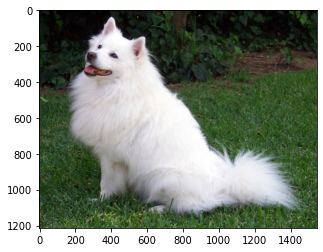

In [4]:
import matplotlib.pyplot as plt
plt.imshow(input_image)
plt.show()

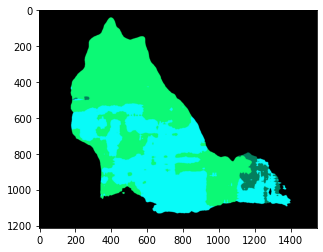

In [5]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

plt.imshow(r)
# plt.show()

### Model Description

FCN-ResNet101 is constructed by a Fully-Convolutional Network model with a ResNet-101 backbone.
The pre-trained models have been trained on a subset of COCO train2017, on the 20 categories that are present in the Pascal VOC dataset.

Their accuracies of the pre-trained models evaluated on COCO val2017 dataset are listed below.

| Model structure |   Mean IOU  | Global Pixelwise Accuracy |
| --------------- | ----------- | --------------------------|
|  fcn_resnet101  |   63.7      |   91.9                    |

### Resources

 - [Fully Convolutional Networks for Semantic Segmentation](https://arxiv.org/abs/1605.06211)

# 수강생분의 이름, 학번을 반영해주세요.

In [6]:
id = '20197132'
name = '주준하'
print(id, name)

20197132 주준하


구글 드라이브 연동

In [7]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


실습, 샘플이미지 폴더 경로 설정

In [15]:
import os
import glob

workspace_path = '/gdrive/My Drive/Colab Notebooks/CV_과제7'  # 실습파일 저장 경로 설정
img_path = os.path.join(workspace_path, 'samples')  # 테스트 샘플이미지 폴더 경로 설정
img_list = glob.glob(os.path.join(img_path, '*.jpg'))  # 샘플이미지 목록 추출

In [16]:
img_list  # 샘플 이미지 목록

['/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (93).jpg',
 '/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (8).jpg',
 '/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (77).jpg',
 '/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (62).jpg',
 '/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (61).jpg',
 '/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (6).jpg',
 '/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (508).jpg',
 '/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (5).jpg',
 '/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (465).jpg',
 '/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (4).jpg',
 '/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (3).jpg',
 '/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (34).jpg',
 '/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (175).jpg',
 '/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (221).jpg',
 '/gdrive/My Drive/Colab Notebooks/CV_과제7/samples/image (167).j

Segmentation:   0%|          | 0/9 [00:00<?, ?it/s]

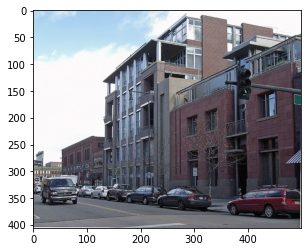

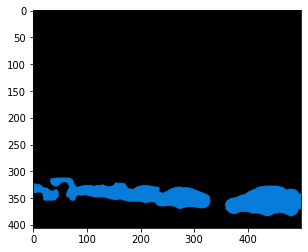

Segmentation:  11%|█         | 1/9 [00:01<00:08,  1.03s/it]

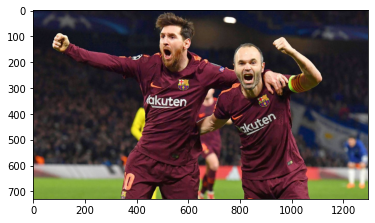

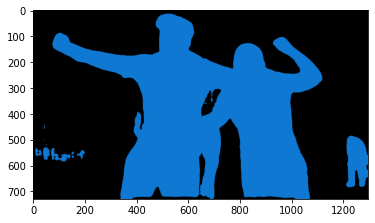

Segmentation:  22%|██▏       | 2/9 [00:03<00:12,  1.81s/it]

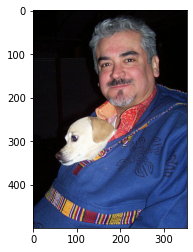

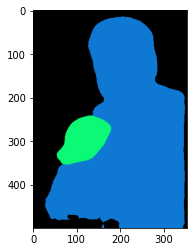

Segmentation:  33%|███▎      | 3/9 [00:04<00:09,  1.56s/it]

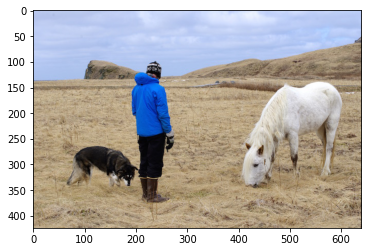

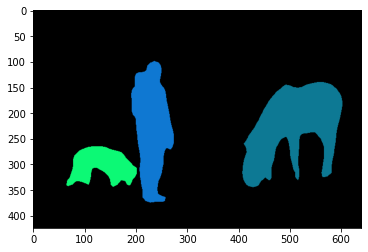

Segmentation:  44%|████▍     | 4/9 [00:05<00:07,  1.48s/it]

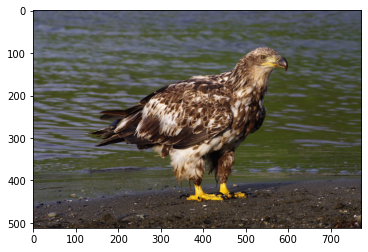

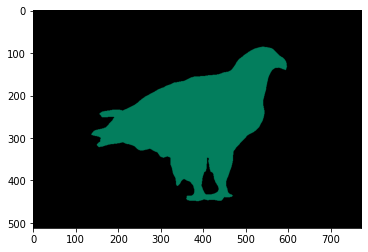

Segmentation:  56%|█████▌    | 5/9 [00:07<00:05,  1.46s/it]

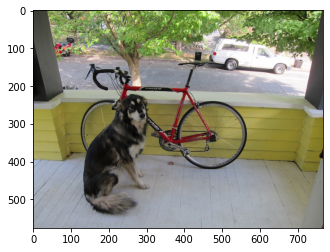

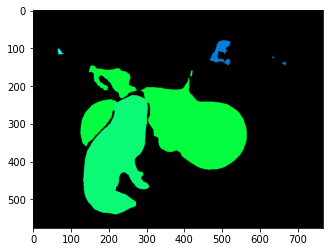

Segmentation:  67%|██████▋   | 6/9 [00:08<00:04,  1.34s/it]

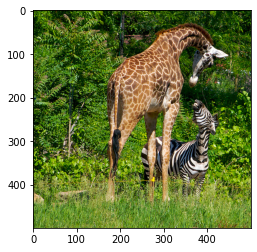

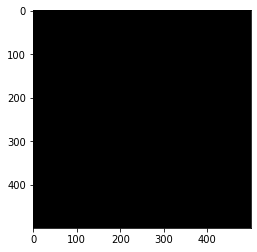

Segmentation:  78%|███████▊  | 7/9 [00:09<00:02,  1.37s/it]

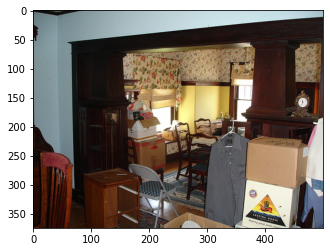

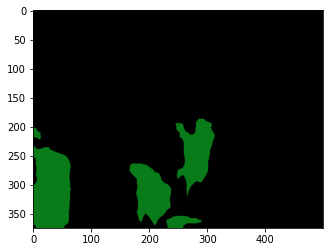

Segmentation:  89%|████████▉ | 8/9 [00:10<00:01,  1.15s/it]

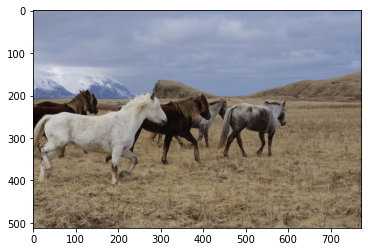

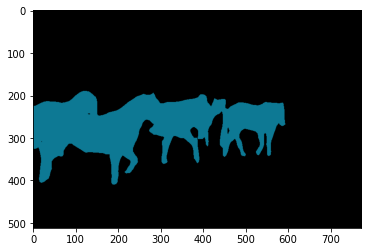

Segmentation: 100%|██████████| 9/9 [00:11<00:00,  1.29s/it]


In [12]:
import tqdm

model.eval()  # Set model to evaluation mode

Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

for img_name in tqdm.tqdm(img_list, desc="Segmentation"):

    input_image = Image.open(img_name)
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')

    with torch.no_grad():
        output = model(input_batch)['out'][0]
    output_predictions = output.argmax(0)

    plt.imshow(input_image)
    plt.show()

    # plot the semantic segmentation predictions of 21 classes in each color
    r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
    r.putpalette(colors)
    plt.imshow(r)
    plt.show()

# 실습과제

## Kaggle 에서 open dataset 다운로드 받아서 segmentation 결과 출력하기
- 객체 탐지용 open dataset 목록: https://www.kaggle.com/datasets?search=object+detection
- 1) 사람, 자동차, 개, 자전거, 의자, 말, 새 등 탐지할만한 데이터셋 찾아서 다운로드 (pretrained 모델은 COCO 데이터셋 중 20개 클래스에 대해서만 학습 진행함)
- 2) 데이터셋에 포함된 이미지가 너무 많다면 랜덤하게 20장만 선별하기
- 3) FCN-ResNet101 모델로 segmentation 결과 출력하기(예제 코드 수정)
- 4) Segmentation 결과 분석하기
* 유의사항: 데이터셋을 구글드라이브에 업로드한 이후에 구글드라이브 마운트하기 (파일 업로드 이후에 마운트해야 파일 접근 가능)

실습문제 1. Segmentation 결과 출력(예제 코드 수정하여 출력결과 보이기)

In [17]:
import tqdm

model.eval()  # Set model to evaluation mode

Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

for img_name in tqdm.tqdm(img_list, desc="Segmentation"):

    input_image = Image.open(img_name)
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')

    with torch.no_grad():
        output = model(input_batch)['out'][0]
    output_predictions = output.argmax(0)

    plt.imshow(input_image)
    plt.show()

    # plot the semantic segmentation predictions of 21 classes in each color
    r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
    r.putpalette(colors)
    plt.imshow(r)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

실습문제 2. 선택한 데이터셋 정보(이름, 다운로드 링크): 


Pedestrian Detection Data set : https://www.kaggle.com/karthika95/pedestrian-detection

실습문제 3. Segmentation 결과 분석(어떤 경우에 Segmentation 결과가 우수/미흡한지?): 

이미지 상의 객체가 가려지지 않고 경계선이 뚜렷할 때 좋은 결과를 얻을 수 있었다.